In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Creating Training Dataset

In [ ]:
# Check and display the number of images in train-dataset.
train_image_data_dir = "/content/drive/MyDrive/FracAtlas/train-img/train/"
train_image_data_dir = pathlib.Path(train_image_data_dir) #pathlib.path is used to join paths
train_image_count = len(list(train_image_data_dir.glob('*/*.jpg')))
train_image_count_fractured = len(list(train_image_data_dir.glob('Fractured/*')))
train_image_count_non_fractured = len(list(train_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(train_image_count))
print("fractured = "+str(train_image_count_fractured))
print("non-fractured = "+str(train_image_count_non_fractured))

Total = 3267
fractured = 574
non-fractured = 2693


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(train_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(train_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/train-img/train/",name))
    print(name)

100%|██████████| 574/574 [00:11<00:00, 51.32it/s] 


Creating validation Dataset

In [ ]:
# Check and display the number of images in valid-dataset.
valid_image_data_dir = "/content/drive/MyDrive/FracAtlas/valid-img/valid/"
valid_image_data_dir = pathlib.Path(valid_image_data_dir)
valid_image_count = len(list(valid_image_data_dir.glob('*/*.jpg')))
valid_image_count_fractured = len(list(valid_image_data_dir.glob('Fractured/*')))
Valid_image_count_non_fractured = len(list(valid_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(valid_image_count))
print("fractured = "+str(valid_image_count_fractured))
print("non-fractured = "+str(Valid_image_count_non_fractured))

Total = 469
fractured = 82
non-fractured = 387


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(valid_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(valid_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/valid-img/valid/",name))
    print(name)

100%|██████████| 82/82 [00:29<00:00,  2.76it/s]


Creating Testing Dataset

In [ ]:
# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/FracAtlas/test-img/test/"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 347
fractured = 61
non-fractured = 286


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/FracAtlas/test-img/test/",name))
    print(name)

100%|██████████| 61/61 [00:23<00:00,  2.62it/s]


Test set for MURA dataset

In [ ]:
# mura dataset

# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/MURA/test/XR_ELBOW/"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.png')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 465
fractured = 230
non-fractured = 235


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/MURA/test/XR_ELBOW/",name))
    print(name)

100%|██████████| 230/230 [00:03<00:00, 60.11it/s] 


Test set for bone fracture dataset

In [ ]:
# bone fracture dataset

# Check and display the number of images in test-dataset.
test_image_data_dir = "/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/"
test_image_data_dir = pathlib.Path(test_image_data_dir)
test_image_count = len(list(test_image_data_dir.glob('*/*.jpg')))
test_image_count_fractured = len(list(test_image_data_dir.glob('Fractured/*')))
test_image_count_non_fractured = len(list(test_image_data_dir.glob('Non_fractured/*')))

print("Total = "+str(test_image_count))
print("fractured = "+str(test_image_count_fractured))
print("non-fractured = "+str(test_image_count_non_fractured))


Total = 399
fractured = 200
non-fractured = 201


In [ ]:
from struct import unpack #struct for unpacking binary data
from tqdm import tqdm #tqdm for iterating over images
import os

#marker_mapping is used to map hexadecimal markers to their corresponding descriptions
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}


class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()

    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]
            if len(data)==0:
                break

#removing corrupt images from Non_fractured images
bads = []

#this section checks every images and if any exception occurs then listed the file as corrupt file
for img in tqdm(list(test_image_data_dir.glob('Non_fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)

#remove corrupt images
for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",name))
    print(name)

#removing corrupt images from Fractured images
bads = []

for img in tqdm(list(test_image_data_dir.glob('Fractured/*'))):
  image = os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",img)
  image = JPEG(image)
  try:
    image.decode()
  except:
    bads.append(img)


for name in bads:
    os.remove(os.path.join("/content/drive/MyDrive/Bone Fracture Images (2)/dataset/test/",name))
    print(name)

100%|██████████| 200/200 [00:04<00:00, 47.72it/s]


Defining Image Size

In [ ]:
# Define the basic parameter, e.g., Batch Size, Image Size.
batch_size = 32 #refers to the number of training examples utilize in one iteration
img_height = 224
img_width = 224

Training Dataset

In [ ]:
# Define to use 100% of the images for training.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_image_data_dir,
  #validation_split=0.2,
  #subset="training",
  seed=123, #works same as random state
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True, #This parameter indicates whether to crop the images to match the specified aspect ratio
  batch_size=batch_size)

Found 3267 files belonging to 2 classes.


Validation Dataset

In [ ]:
# Define to use 100% of the images for validation.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  valid_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 469 files belonging to 2 classes.


Testing Dataset

In [ ]:
# Define to use 100% of the images for validation.
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 347 files belonging to 2 classes.


In [ ]:
# Display the name of classes.
class_names = test_ds.class_names
print(class_names)

['Fractured', 'Non_fractured']


In [ ]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(30, 224, 224, 3)
(30, 2)


Test set for MURA dataset

In [ ]:
# Define to use 100% of the images for validation.

# mura dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 465 files belonging to 2 classes.


Test set for bone fracture dataset

In [ ]:
# Define to use 100% of the images for validation.

# bone fracture dataset

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_image_data_dir,
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  label_mode="categorical",
  image_size=(img_height, img_width),
  crop_to_aspect_ratio=True,
  batch_size=batch_size)

Found 399 files belonging to 2 classes.


Configure the dataset for performance

In [ ]:
#optimization algorithm
AUTOTUNE = tf.data.AUTOTUNE
#tf.data.AUTOTUNE , which will prompt the tf.data runtime to tune the value dynamically at runtime.
#tf.data builds a performance model of the input pipeline and runs an optimization algorithm to find a good allocation of its CPU budget across all parameters specified as AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Importing Functions To Implement Model

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os

import numpy as np

from tensorflow.python.keras.utils.data_utils import get_file
from tensorflow.python.util.tf_export import keras_export

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.layers import BatchNormalization, concatenate
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_file

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.3 MB/s eta 0:00:00


Defining Metrics

In [ ]:
precision_m = tf.keras.metrics.Precision()

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

Implementing Model

In [ ]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F

class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size(0), -1)
class ChannelGate(nn.Module):
    def __init__(self, gate_channel, reduction_ratio=16, num_layers=1):
        super(ChannelGate, self).__init__()
        self.gate_activation = gate_activation
        self.gate_c = nn.Sequential()
        self.gate_c.add_module( 'flatten', Flatten() )
        gate_channels = [gate_channel]
        gate_channels += [gate_channel // reduction_ratio] * num_layers
        gate_channels += [gate_channel]
        for i in range( len(gate_channels) - 2 ):
            self.gate_c.add_module( 'gate_c_fc_%d'%i, nn.Linear(gate_channels[i], gate_channels[i+1]) )
            self.gate_c.add_module( 'gate_c_bn_%d'%(i+1), nn.BatchNorm1d(gate_channels[i+1]) )
            self.gate_c.add_module( 'gate_c_relu_%d'%(i+1), nn.ReLU() )
        self.gate_c.add_module( 'gate_c_fc_final', nn.Linear(gate_channels[-2], gate_channels[-1]) )
    def forward(self, in_tensor):
        avg_pool = F.avg_pool2d( in_tensor, in_tensor.size(2), stride=in_tensor.size(2) )
        return self.gate_c( avg_pool ).unsqueeze(2).unsqueeze(3).expand_as(in_tensor)

class SpatialGate(nn.Module):
    def __init__(self, gate_channel, reduction_ratio=16, dilation_conv_num=2, dilation_val=4):
        super(SpatialGate, self).__init__()
        self.gate_s = nn.Sequential()
        self.gate_s.add_module( 'gate_s_conv_reduce0', nn.Conv2d(gate_channel, gate_channel//reduction_ratio, kernel_size=1))
        self.gate_s.add_module( 'gate_s_bn_reduce0',	nn.BatchNorm2d(gate_channel//reduction_ratio) )
        self.gate_s.add_module( 'gate_s_relu_reduce0',nn.ReLU() )
        for i in range( dilation_conv_num ):
            self.gate_s.add_module( 'gate_s_conv_di_%d'%i, nn.Conv2d(gate_channel//reduction_ratio, gate_channel//reduction_ratio, kernel_size=3, \
						padding=dilation_val, dilation=dilation_val) )
            self.gate_s.add_module( 'gate_s_bn_di_%d'%i, nn.BatchNorm2d(gate_channel//reduction_ratio) )
            self.gate_s.add_module( 'gate_s_relu_di_%d'%i, nn.ReLU() )
        self.gate_s.add_module( 'gate_s_conv_final', nn.Conv2d(gate_channel//reduction_ratio, 1, kernel_size=1) )
    def forward(self, in_tensor):
        return self.gate_s( in_tensor ).expand_as(in_tensor)
class BAM(nn.Module):
    def __init__(self, gate_channel):
        super(BAM, self).__init__()
        self.channel_att = ChannelGate(gate_channel)
        self.spatial_att = SpatialGate(gate_channel)
    def forward(self,in_tensor):
        att = 1 + F.sigmoid( self.channel_att(in_tensor) * self.spatial_att(in_tensor) )
        return att * in_tensor

In [ ]:
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras import layers, Sequential


class ChannelAttention(layers.Layer):
    def __init__(self, channel, reduction=16, num_layers=3):
        super(ChannelAttention, self).__init__()
        self.avg_pool = layers.GlobalAvgPool2D(keepdims=True)
        gate_channels = [channel]
        gate_channels += [channel // reduction] * num_layers
        gate_channels += [channel]

        self.ca = Sequential()
        for i in range(len(gate_channels) - 2):
            self.ca.add(layers.Dense(gate_channels[i + 1]))
            self.ca.add(layers.BatchNormalization())
            self.ca.add(layers.Activation('relu'))
        self.ca.add(layers.Dense(gate_channels[-1]))

    def call(self, x):
        res = self.avg_pool(x)
        res = self.ca(res)
        return res


class SpatialAttention(layers.Layer):
    def __init__(self, channel, reduction=16, num_layers=3, dia_val=2):
        super(SpatialAttention, self).__init__()
        self.sa = Sequential()
        self.sa.add(layers.Conv2D(filters=channel // reduction, kernel_size=1))
        self.sa.add(layers.BatchNormalization())
        self.sa.add(layers.Activation('relu'))
        for i in range(num_layers):
            self.sa.add(
                layers.Conv2D(filters=channel // reduction, kernel_size=3, padding='same', dilation_rate=dia_val))
            self.sa.add(layers.BatchNormalization())
            self.sa.add(layers.Activation('relu'))
        self.sa.add(layers.Conv2D(1, kernel_size=1))

    def call(self, x):
        res = self.sa(x)
        return res


class BAMBlock(layers.Layer):
    def __init__(self, channel=512, reduction=16, dia_val=2):
        super(BAMBlock, self).__init__()
        self.ca = ChannelAttention(channel=channel, reduction=reduction)
        self.sa = SpatialAttention(channel=channel, reduction=reduction, dia_val=dia_val)
        self.sigmoid = tf.sigmoid

    def call(self, x):
        sa_out = self.sa(x)
        ca_out = self.ca(x)
        weight = self.sigmoid(sa_out + ca_out)
        out = (1 + weight) * x
        return out


input = tf.random.normal((50, 12, 12, 192))
bam = BAMBlock(channel=192, reduction=16, dia_val=2)
output = bam(input)
print(output.shape)

(50, 12, 12, 192)


In [ ]:
import tensorflow.python.keras.engine.training

In [ ]:
import tensorflow.keras.layers

In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
# InceptionV3

import tensorflow as tf

from keras import backend
from keras_applications import imagenet_utils
from tensorflow.keras import layers, Model
from tensorflow.python.keras.utils.data_utils import get_file


# isort: off
from tensorflow.python.util.tf_export import keras_export

WEIGHTS_PATH = (
    "https://storage.googleapis.com/tensorflow/keras-applications/"
    "inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels.h5"
)

WEIGHTS_PATH_NO_TOP = (
    "https://storage.googleapis.com/tensorflow/keras-applications/"
    "inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
)


@keras_export(
    "keras.applications.inception_v3.InceptionV3",
    "keras.applications.InceptionV3",
)

def InceptionV3_att(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    att_type = "BAM",
    classifier_activation="softmax",
):
    """Instantiates the Inception v3 architecture.

    Reference:
    - [Rethinking the Inception Architecture for Computer Vision](
        http://arxiv.org/abs/1512.00567) (CVPR 2016)

    This function returns a Keras image classification model,
    optionally loaded with weights pre-trained on ImageNet.

    For image classification use cases, see
    [this page for detailed examples](
      https://keras.io/api/applications/#usage-examples-for-image-classification-models).

    For transfer learning use cases, make sure to read the
    [guide to transfer learning & fine-tuning](
      https://keras.io/guides/transfer_learning/).

    Note: each Keras Application expects a specific kind of input preprocessing.
    For `InceptionV3`, call
    `tf.keras.applications.inception_v3.preprocess_input` on your inputs before
    passing them to the model. `inception_v3.preprocess_input` will scale input
    pixels between -1 and 1.

    Args:
      include_top: Boolean, whether to include the fully-connected
        layer at the top, as the last layer of the network. Defaults to `True`.
      weights: One of `None` (random initialization),
        `imagenet` (pre-training on ImageNet),
        or the path to the weights file to be loaded. Defaults to `imagenet`.
      input_tensor: Optional Keras tensor (i.e. output of `layers.Input()`)
        to use as image input for the model. `input_tensor` is useful for
        sharing inputs between multiple different networks. Defaults to `None`.
      input_shape: Optional shape tuple, only to be specified
        if `include_top` is False (otherwise the input shape
        has to be `(299, 299, 3)` (with `channels_last` data format)
        or `(3, 299, 299)` (with `channels_first` data format).
        It should have exactly 3 inputs channels,
        and width and height should be no smaller than 75.
        E.g. `(150, 150, 3)` would be one valid value.
        `input_shape` will be ignored if the `input_tensor` is provided.
      pooling: Optional pooling mode for feature extraction
        when `include_top` is `False`.
        - `None` (default) means that the output of the model will be
            the 4D tensor output of the last convolutional block.
        - `avg` means that global average pooling
            will be applied to the output of the
            last convolutional block, and thus
            the output of the model will be a 2D tensor.
        - `max` means that global max pooling will be applied.
      classes: optional number of classes to classify images
        into, only to be specified if `include_top` is True, and
        if no `weights` argument is specified. Defaults to 1000.
      classifier_activation: A `str` or callable. The activation function to use
        on the "top" layer. Ignored unless `include_top=True`. Set
        `classifier_activation=None` to return the logits of the "top" layer.
        When loading pretrained weights, `classifier_activation` can only
        be `None` or `"softmax"`.

    Returns:
      A `keras.Model` instance.
    """

    if not (weights in {"imagenet", None} or tf.io.gfile.exists(weights)):
        raise ValueError(
            "The `weights` argument should be either "
            "`None` (random initialization), `imagenet` "
            "(pre-training on ImageNet), "
            "or the path to the weights file to be loaded; "
            f"Received: weights={weights}"
        )

    if weights == "imagenet" and include_top and classes != 1000:
        raise ValueError(
            'If using `weights` as `"imagenet"` with `include_top` '
            "as true, `classes` should be 1000; "
            f"Received classes={classes}"
        )

    # Determine proper input shape
    input_shape = imagenet_utils._obtain_input_shape(
        input_shape,
        default_size=299,
        min_size=75,
        data_format=backend.image_data_format(),
        require_flatten=include_top,
        weights=weights,
    )

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if backend.image_data_format() == "channels_first":
        channel_axis = 1
    else:
        channel_axis = 3



    x = conv2d_bn(img_input, 32, 3, 3, strides=(2, 2), padding="valid")



    x = conv2d_bn(x, 32, 3, 3, padding="valid")
    x = conv2d_bn(x, 64, 3, 3)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv2d_bn(x, 80, 1, 1, padding="valid")
    x = conv2d_bn(x, 192, 3, 3, padding="valid")

    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)


    # mixed 0: 35 x 35 x 256
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)

    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 32, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed0",
    )

    # mixed 1: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed1",
    )

    # mixed 2: 35 x 35 x 288
    branch1x1 = conv2d_bn(x, 64, 1, 1)

    branch5x5 = conv2d_bn(x, 48, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name="mixed2",
    )

###### attention1
    att = BAMBlock(channel=288, reduction=16, dia_val=2)
    x = att(x)
#####

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn(x, 384, 3, 3, strides=(2, 2), padding="valid")

    branch3x3dbl = conv2d_bn(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding="valid"
    )

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch3x3dbl, branch_pool], axis=channel_axis, name="mixed3"
    )

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 128, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name="mixed4",
    )

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn(x, 192, 1, 1)

        branch7x7 = conv2d_bn(x, 160, 1, 1)
        branch7x7 = conv2d_bn(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

        branch_pool = layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding="same"
        )(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name="mixed" + str(5 + i),
        )

###### attention2
    att = BAMBlock(channel=768, reduction=16, dia_val=2)
    x = att(x)
######

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn(x, 192, 1, 1)

    branch7x7 = conv2d_bn(x, 192, 1, 1)
    branch7x7 = conv2d_bn(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn(branch7x7dbl, 192, 1, 7)

    branch_pool = layers.AveragePooling2D(
        (3, 3), strides=(1, 1), padding="same"
    )(x)
    branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name="mixed7",
    )

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn(x, 192, 1, 1)
    branch3x3 = conv2d_bn(branch3x3, 320, 3, 3, strides=(2, 2), padding="valid")

    branch7x7x3 = conv2d_bn(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding="valid"
    )

    branch_pool = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    x = layers.concatenate(
        [branch3x3, branch7x7x3, branch_pool], axis=channel_axis, name="mixed8"
    )

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn(x, 320, 1, 1)

        branch3x3 = conv2d_bn(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn(branch3x3, 384, 3, 1)
        branch3x3 = layers.concatenate(
            [branch3x3_1, branch3x3_2],
            axis=channel_axis,
            name="mixed9_" + str(i),
        )

        branch3x3dbl = conv2d_bn(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = layers.concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis
        )

        branch_pool = layers.AveragePooling2D(
            (3, 3), strides=(1, 1), padding="same"
        )(x)
        branch_pool = conv2d_bn(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name="mixed" + str(9 + i),
        )

########### attention3
    att = BAMBlock(channel=2048, reduction=16, dia_val=2)
    x = att(x)
##########

    if include_top:
        # Classification block
        x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
        imagenet_utils.validate_activation(classifier_activation, weights)
        x = layers.Dense(
            classes, activation=classifier_activation, name="predictions"
        )(x)
    else:
        if pooling == "avg":
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == "max":
            x = layers.GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = layer_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name="inception_v3")

    # Load weights.
    if weights == "imagenet":
        if include_top:
            weights_path = get_file(
                "inception_v3_weights_tf_dim_ordering_tf_kernels.h5",
                WEIGHTS_PATH,
                cache_subdir="models",
                file_hash="9a0d58056eeedaa3f26cb7ebd46da564",
            )
        else:
            weights_path = get_file(
                "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5",
                WEIGHTS_PATH_NO_TOP,
                cache_subdir="models",
                file_hash="bcbd6486424b2319ff4ef7d526e38f63",
            )
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

def conv2d_bn(
    x, filters, num_row, num_col, padding="same", strides=(1, 1), name=None
):
    """Utility function to apply conv + BN.

    Args:
      x: input tensor.
      filters: filters in `Conv2D`.
      num_row: height of the convolution kernel.
      num_col: width of the convolution kernel.
      padding: padding mode in `Conv2D`.
      strides: strides in `Conv2D`.
      name: name of the ops; will become `name + '_conv'`
        for the convolution and `name + '_bn'` for the
        batch norm layer.

    Returns:
      Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + "_bn"
        conv_name = name + "_conv"
    else:
        bn_name = None
        conv_name = None
    if backend.image_data_format() == "channels_first":
        bn_axis = 1
    else:
        bn_axis = 3
    x = layers.Conv2D(
        filters,
        (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name,
    )(x)
    x = layers.BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = layers.Activation("relu", name=name)(x)
    return x


@keras_export("keras.applications.inception_v3.preprocess_input")
def preprocess_input(x, data_format=None):
    return imagenet_utils.preprocess_input(
        x, data_format=data_format, mode="tf"
    )


@keras_export("keras.applications.inception_v3.decode_predictions")
def decode_predictions(preds, top=5):
    return imagenet_utils.decode_predictions(preds, top=top)



In [ ]:
#model for weight=None

#from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Create InceptionV3 base model
base_model = InceptionV3_att(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1000, activation='relu')(x) #hidden layer=1000
predictions = Dense(2, activation='softmax')(x) #ouput layer=2

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

#declaring learning rate and its changes
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100, #learning rate decay after 100 steps
    decay_rate=0.90, #learning rate decays 90%
    staircase=True)

# Compile the model (you can adjust the optimizer and loss function)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy', precision, recall, f1])

#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 111, 111, 32)         96        ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 111, 111, 32)         0         ['batch_normalization_7[0]

In [ ]:
import keras

dot_img_file = '/model_1.png'
keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
# Start model training with Dropout using validation set
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
109/109 [==============================] - 119s 377ms/step - loss: 0.6828 - accuracy: 0.8059 - precision: 0.8060 - recall: 0.8060 - f1: 0.8060 - val_loss: 0.7712 - val_accuracy: 0.7953 - val_precision: 0.7940 - val_recall: 0.7940 - val_f1: 0.7940
Epoch 2/5
109/109 [==============================] - 26s 242ms/step - loss: 0.4385 - accuracy: 0.8212 - precision: 0.8213 - recall: 0.8213 - f1: 0.8213 - val_loss: 0.5162 - val_accuracy: 0.8252 - val_precision: 0.8243 - val_recall: 0.8243 - val_f1: 0.8243
Epoch 3/5
109/109 [==============================] - 27s 245ms/step - loss: 0.4128 - accuracy: 0.8252 - precision: 0.8252 - recall: 0.8252 - f1: 0.8252 - val_loss: 0.4246 - val_accuracy: 0.8188 - val_precision: 0.8181 - val_recall: 0.8181 - val_f1: 0.8181
Epoch 4/5
109/109 [==============================] - 27s 248ms/step - loss: 0.4019 - accuracy: 0.8329 - precision: 0.8329 - recall: 0.8329 - f1: 0.8329 - val_loss: 0.4376 - val_accuracy: 0.8188 - val_precision: 0.8181 - val_recall:

In [ ]:
# Start model training with Dropout using validation set
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
109/109 [==============================] - 27s 248ms/step - loss: 0.3706 - accuracy: 0.8359 - precision: 0.8359 - recall: 0.8359 - f1: 0.8359 - val_loss: 0.4820 - val_accuracy: 0.8017 - val_precision: 0.8002 - val_recall: 0.8002 - val_f1: 0.8002
Epoch 2/50
109/109 [==============================] - 27s 247ms/step - loss: 0.3573 - accuracy: 0.8491 - precision: 0.8491 - recall: 0.8491 - f1: 0.8491 - val_loss: 0.4542 - val_accuracy: 0.8380 - val_precision: 0.8368 - val_recall: 0.8368 - val_f1: 0.8368
Epoch 3/50
109/109 [==============================] - 27s 249ms/step - loss: 0.3405 - accuracy: 0.8546 - precision: 0.8546 - recall: 0.8546 - f1: 0.8546 - val_loss: 0.5310 - val_accuracy: 0.7569 - val_precision: 0.7565 - val_recall: 0.7565 - val_f1: 0.7565
Epoch 4/50
109/109 [==============================] - 27s 250ms/step - loss: 0.3143 - accuracy: 0.8672 - precision: 0.8672 - recall: 0.8672 - f1: 0.8672 - val_loss: 0.4246 - val_accuracy: 0.8188 - val_precision: 0.8157 - val_reca

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'f1', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_f1'])

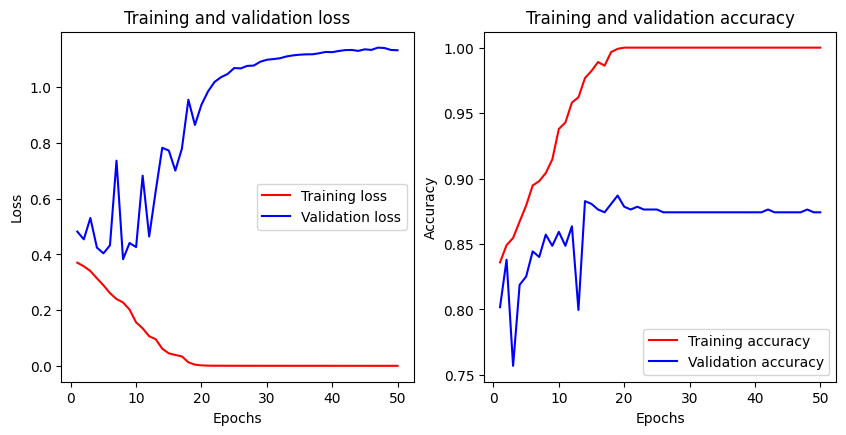

In [ ]:
import matplotlib.pyplot as plt
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,loss,'r',label='Training loss')
ax1.plot(epochs,val_loss,'b',label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,acc,'r',label='Training accuracy')
ax2.plot(epochs,val_acc,'b',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()


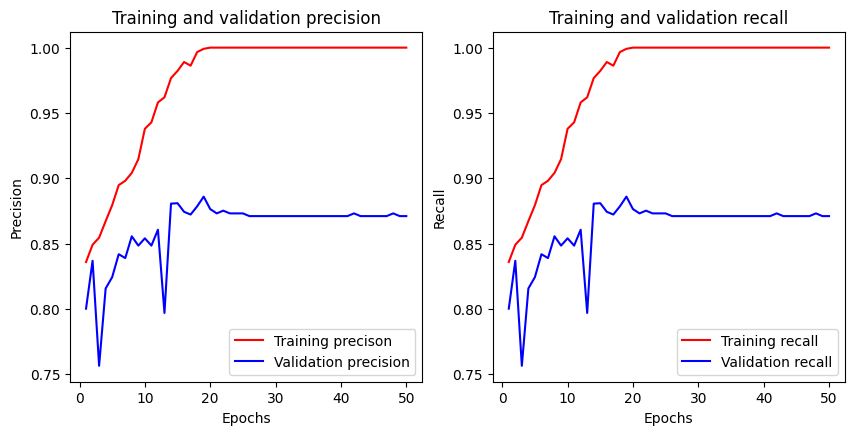

In [ ]:
import matplotlib.pyplot as plt
pre=history_dict['precision']
val_pre=history_dict['val_precision']
rec=history_dict['recall']
val_rec=history_dict['val_recall']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,pre,'r',label='Training precison')
ax1.plot(epochs,val_pre,'b',label='Validation precision')
ax1.set_title('Training and validation precision')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Precision')
ax1.legend()

ax2=plt.subplot(222)
ax2.plot(epochs,rec,'r',label='Training recall')
ax2.plot(epochs,val_rec,'b',label='Validation recall')
ax2.set_title('Training and validation recall')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Recall')
ax2.legend()

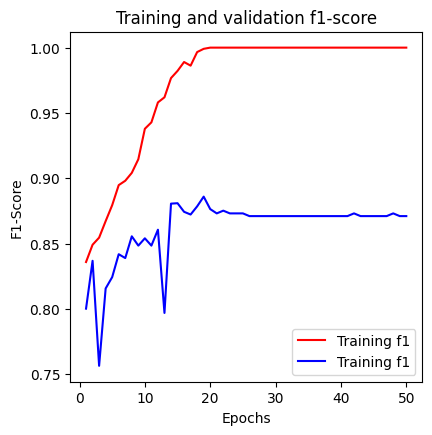

In [ ]:
import matplotlib.pyplot as plt
f1=history_dict['f1']
val_f1=history_dict['val_f1']

epochs=range(1,len(acc)+1)
plt.figure(figsize=(10,10))

ax1=plt.subplot(221)
ax1.plot(epochs,f1,'r',label='Training f1')
ax1.plot(epochs,val_f1,'b',label='Training f1')
ax1.set_title('Training and validation f1-score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('F1-Score')
ax1.legend()

In [ ]:
# FracAtlas dataset

model.evaluate(test_ds)

12/12 [==============================] - 5s 329ms/step - loss: 1.0612 - accuracy: 0.9020 - precision: 0.9034 - recall: 0.9034 - f1: 0.9034


[1.0612047910690308,
 0.9020172953605652,
 0.9034313559532166,
 0.9034313559532166,
 0.9034313559532166]

In [ ]:
# mura dataset

model.evaluate(test_ds)

16/16 [==============================] - 7s 347ms/step - loss: 4.1302 - accuracy: 0.4903 - precision: 0.4938 - recall: 0.4938 - f1: 0.4938


[4.130208492279053,
 0.4903225898742676,
 0.49375003576278687,
 0.49375003576278687,
 0.4937500059604645]

In [ ]:
# bone fracture dataset

model.evaluate(test_ds)

14/14 [==============================] - 4s 232ms/step - loss: 4.3618 - accuracy: 0.5138 - precision: 0.5103 - recall: 0.5103 - f1: 0.5103


[4.361846923828125,
 0.5137844681739807,
 0.5103174448013306,
 0.5103174448013306,
 0.5103173851966858]